In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
import pandas as pd
import pandas as pd                   
import matplotlib.pyplot as plt
import seaborn as sns
# 머신러닝 모델들
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

train = pd.read_excel('Train_dataset.xlsx')
answer = pd.read_excel('Answer_sheet.xlsx')

In [3]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9602452490004865469
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5717884928
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7865045101627575525
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:07:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [4]:
display(train)
train.head()

,Time,Power
0,20180101_0,105.760
1,20180101_1,104.944
2,20180101_2,105.552
3,20180101_3,108.512
4,20180101_4,102.896
...,...,...
7858,20181231_18,141.440
7859,20181231_19,149.632
7860,20181231_20,154.624
7861,20181231_21,162.688


,Time,Power
0,20180101_0,105.760
1,20180101_1,104.944
2,20180101_2,105.552
3,20180101_3,108.512
4,20180101_4,102.896


In [5]:
train.columns.values

array(['Time', 'Power'], dtype=object)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7863 entries, 0 to 7862
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7863 non-null   object 
 1   Power   7863 non-null   float64
dtypes: float64(1), object(1)
memory usage: 123.0+ KB


In [7]:
train['Time'] = pd.to_datetime(train['Time'], format='%Y%m%d_%H')
answer['Time'] = pd.to_datetime(answer['Time'], format='%Y%m%d_%H')
#train['Month'] = train['Time'].dt.month
#train['Day'] = train['Time'].dt.day
#train['Hour'] = train['Time'].dt.hour
#answer['Month'] = answer['Time'].dt.month
#answer['Day'] = answer['Time'].dt.day
#answer['Hour'] = answer['Time'].dt.hour

In [8]:
display(train)
display(answer)

,Time,Power
0,2018-01-01 00:00:00,105.760
1,2018-01-01 01:00:00,104.944
2,2018-01-01 02:00:00,105.552
3,2018-01-01 03:00:00,108.512
4,2018-01-01 04:00:00,102.896
...,...,...
7858,2018-12-31 18:00:00,141.440
7859,2018-12-31 19:00:00,149.632
7860,2018-12-31 20:00:00,154.624
7861,2018-12-31 21:00:00,162.688


,Time,Power
0,2018-01-01 14:00:00,NaN
1,2018-01-01 17:00:00,NaN
2,2018-01-01 19:00:00,NaN
3,2018-01-01 23:00:00,NaN
4,2018-01-01 08:00:00,NaN
...,...,...
868,2018-12-30 15:00:00,NaN
869,2018-12-31 00:00:00,NaN
870,2018-12-31 13:00:00,NaN
871,2018-12-31 17:00:00,NaN


In [9]:
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7863 entries, 0 to 7862
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    7863 non-null   datetime64[ns]
 1   Power   7863 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 123.0 KB


In [10]:
# Q1 = np.percentile(train['Power'], 25)
# Q3 = np.percentile(train['Power'], 75)

# # Calculate the interquartile range
# IQR = Q3 - Q1

# # Define the outlier bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# print(lower_bound,upper_bound)
# # Identify the outliers
# outliers = [x for x in train['Power'] if x < lower_bound or x > upper_bound]

# # Print the results
# # print("Outliers:", outliers)
# # print(len(outliers))
def remove_outlier(d_cp, column):
    fraud_column_data = d_cp[column]
    quan_25 = np.percentile(fraud_column_data.values, 25)
    quan_75 = np.percentile(fraud_column_data.values, 75)

    iqr = quan_75 - quan_25
    iqr_weight = iqr * 1.5
    lowest = quan_25 - iqr_weight
    highest = quan_75 + iqr_weight

    outlier_index = fraud_column_data[(fraud_column_data < lowest) | (fraud_column_data > highest)].index
    d_cp.drop(outlier_index, axis=0, inplace=True)
    return d_cp

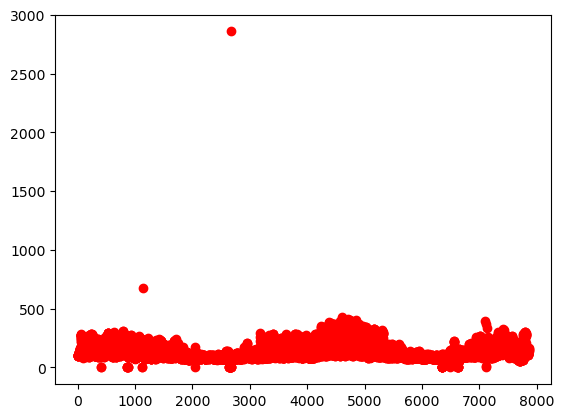

In [11]:
import numpy as np

plt.plot(train['Power'], 'ro')
train = remove_outlier(train,'Power')

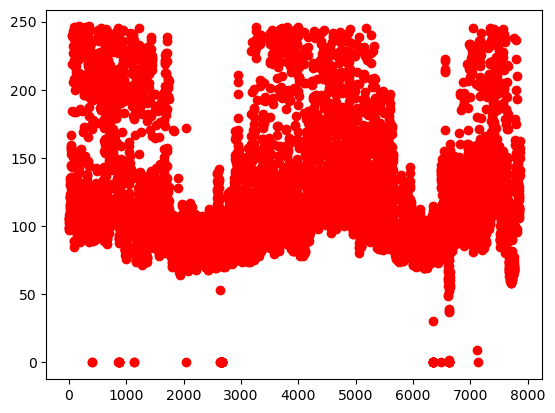

In [12]:
plt.plot(train['Power'], 'ro')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7279 entries, 0 to 7862
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    7279 non-null   datetime64[ns]
 1   Power   7279 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 170.6 KB


<Axes: >

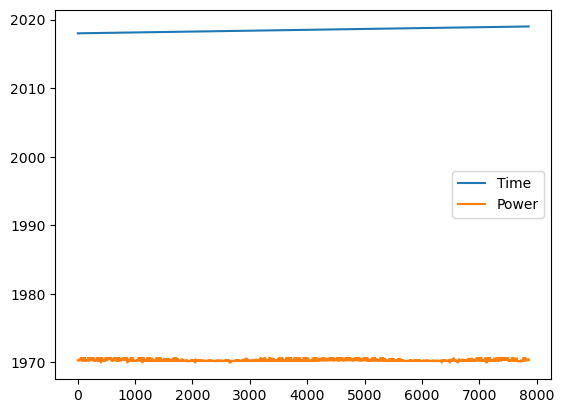

In [13]:
train.info()
train.plot()

In [14]:
from pmdarima.arima import ADFTest

train.set_index('Time', inplace=True)

adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(train)

(0.01, False)

In [15]:
train_1 = train[:7000]
test = train[-279:]

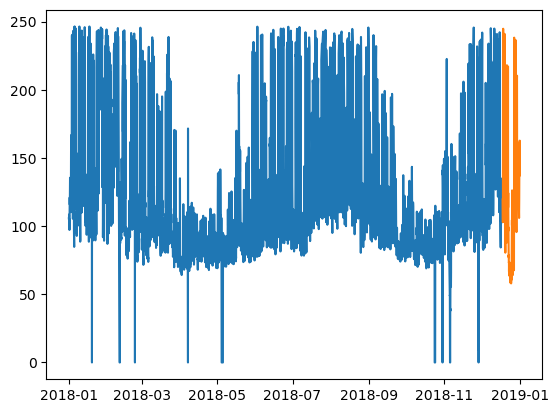

In [16]:
train_1.tail()
test.head()

plt.plot(train_1)
plt.plot(test)

In [17]:
# from pmdarima.arima import auto_arima

# auto_arima_model = auto_arima(train_1, seasonal=True, m=24, trace=True,
#                               error_action='ignore',  suppress_warnings=True, stepwise=True)
# 메모리 부족으로 실행 불가

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=inf, Time=44.96 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=63152.603, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=63111.578, Time=2.65 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=63103.667, Time=3.34 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=63150.603, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[24] intercept   : AIC=63104.986, Time=0.44 sec
 ARIMA(0,1,1)(1,0,1)[24] intercept   : AIC=63102.873, Time=13.30 sec
 ARIMA(0,1,1)(1,0,0)[24] intercept   : AIC=63103.808, Time=4.67 sec
 ARIMA(0,1,1)(2,0,1)[24] intercept   : AIC=inf, Time=46.92 sec
 ARIMA(0,1,1)(1,0,2)[24] intercept   : AIC=inf, Time=44.38 sec
 ARIMA(0,1,1)(0,0,2)[24] intercept   : AIC=63102.188, Time=17.45 sec
 ARIMA(0,1,0)(0,0,2)[24] intercept   : AIC=63148.259, Time=11.90 sec
 ARIMA(1,1,1)(0,0,2)[24] intercept   : AIC=63074.603, Time=32.73 sec
 ARIMA(1,1,1)(0,0,1)[24] intercept   : AIC=63076.304, Time=7.05 sec
 ARIMA(1,1,1)(1,

MemoryError: Unable to allocate 156. MiB for an array with shape (7000, 54, 54) and data type float64

In [ ]:
auto_arima_model.summary()

In [21]:
prediction = pd.DataFrame(auto_arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['Power']
prediction

C:\Users\sunghyun\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,Power
Time,
2018-12-18 03:00:00,NaN
2018-12-18 04:00:00,NaN
2018-12-18 05:00:00,NaN
2018-12-18 06:00:00,NaN
2018-12-18 07:00:00,NaN
...,...
2018-12-31 18:00:00,NaN
2018-12-31 19:00:00,NaN
2018-12-31 20:00:00,NaN


ValueError: 'Left corner' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

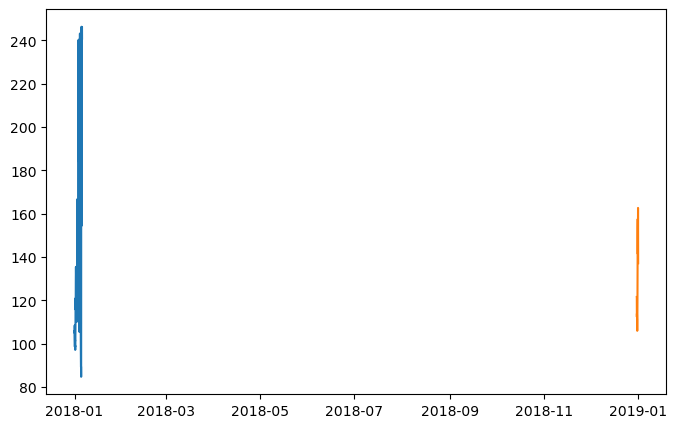

In [23]:
plt.figure(figsize=(8,5))
plt.plot(train_1,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()